In [11]:
import keras
import keras.backend as K
from keras.preprocessing import image
import requests
from skimage.segmentation import slic
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import shap
import os
import cv2
import sys
sys.path.append('..')
from fast_scnn_keras import Fast_SCNN

In [12]:
INPUT_SIZE = (256, 256, 3)

In [13]:
model = Fast_SCNN(input_shape=INPUT_SIZE).model(show_summary=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 896         input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
re_lu_1 (ReLU)       

In [14]:
model.load_weights('../model.h5')

In [15]:
dataset_path = '/home/quantum/Documents/datasets/coco-filtered/'
image_path = 'images/000000000110.jpg'
image = cv2.imread(os.path.join(dataset_path, image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized = cv2.resize(image, (INPUT_SIZE[0], INPUT_SIZE[1])) / 255

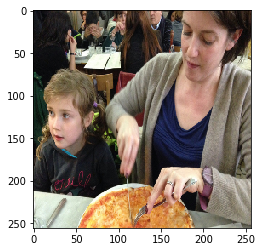

In [16]:
plt.imshow(resized)

In [17]:
def load_image():
    pass
    
def load_random_data(dataset_path, n_samples=10, n_classes=4, input_size=(256, 256, 3), 
                 image_path='images'):
    images = np.zeros((n_samples, *input_size))
    file_names = np.array(os.listdir(os.path.join(dataset_path, image_path)))
    np.random.shuffle(file_names)
    for idx, file_name in enumerate(file_names[:n_samples]):
        image = cv2.imread(os.path.join(dataset_path, image_path, file_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(image, (input_size[0], input_size[1]))
        images[idx] = resized / 255
    return images

In [18]:
load_random_data(dataset_path)

array([[[[0.14509804, 0.34117647, 0.58039216],
         [0.14901961, 0.34509804, 0.59215686],
         [0.14901961, 0.34509804, 0.58431373],
         ...,
         [0.15686275, 0.32941176, 0.58431373],
         [0.15686275, 0.32941176, 0.58431373],
         [0.14901961, 0.3254902 , 0.58039216]],

        [[0.14901961, 0.34509804, 0.59215686],
         [0.14509804, 0.34117647, 0.58823529],
         [0.15294118, 0.34901961, 0.59215686],
         ...,
         [0.14901961, 0.3372549 , 0.58823529],
         [0.14901961, 0.3254902 , 0.58039216],
         [0.14509804, 0.33333333, 0.58431373]],

        [[0.15294118, 0.34509804, 0.59215686],
         [0.14901961, 0.34509804, 0.59215686],
         [0.15686275, 0.35294118, 0.6       ],
         ...,
         [0.15294118, 0.34117647, 0.59215686],
         [0.14117647, 0.32941176, 0.58039216],
         [0.14117647, 0.32941176, 0.58039216]],

        ...,

        [[0.60784314, 0.52941176, 0.40392157],
         [0.64313725, 0.62352941, 0.47843137]

In [19]:
X = load_random_data(dataset_path, n_samples=100)

def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)

NameError: name 'preprocess_input' is not defined

In [44]:
mask_path = '/home/quantum/Documents/datasets/coco_laptops/masks/000000000384.npy'

In [45]:
mask = np.load(mask_path)

In [46]:
mask.shape

(640, 446)

In [51]:
mask.max()

1

In [48]:
converted_mask = np.where(mask == 2, mask, 0)

In [49]:
mask_path = '/home/quantum/Documents/datasets/coco_laptops/masks/000000000384.npy'